In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Step 1: Generate a synthetic 3D dataset
np.random.seed(0)
mean = [0, 0, 0]
cov = [[1, 0.9, 0.7], [0.9, 1, 0.8], [0.7, 0.8, 1]]  # covariance matrix
X = np.random.multivariate_normal(mean, cov, 100)  # 100 samples

In [4]:
# Step 2: Perform PCA to reduce dimensionality from 3D to 2D
# Mean-center the data
X_meaned = X - np.mean(X, axis=0)

# Compute the covariance matrix
cov_matrix = np.cov(X_meaned, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort the eigenvalues and corresponding eigenvectors
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Select the top 2 eigenvectors (for 2D)
P_2 = sorted_eigenvectors[:, :2]

# Transform the original data to the new 2D space
Y_2 = np.dot(X_meaned, P_2)

In [7]:
np.linalg.eigh(cov_matrix)

(array([0.07900523, 0.30401683, 2.77066648]),
 array([[-0.60385427, -0.54435024, -0.58227385],
        [ 0.76269146, -0.18228902, -0.62054206],
        [-0.23165009,  0.81881227, -0.52524728]]))

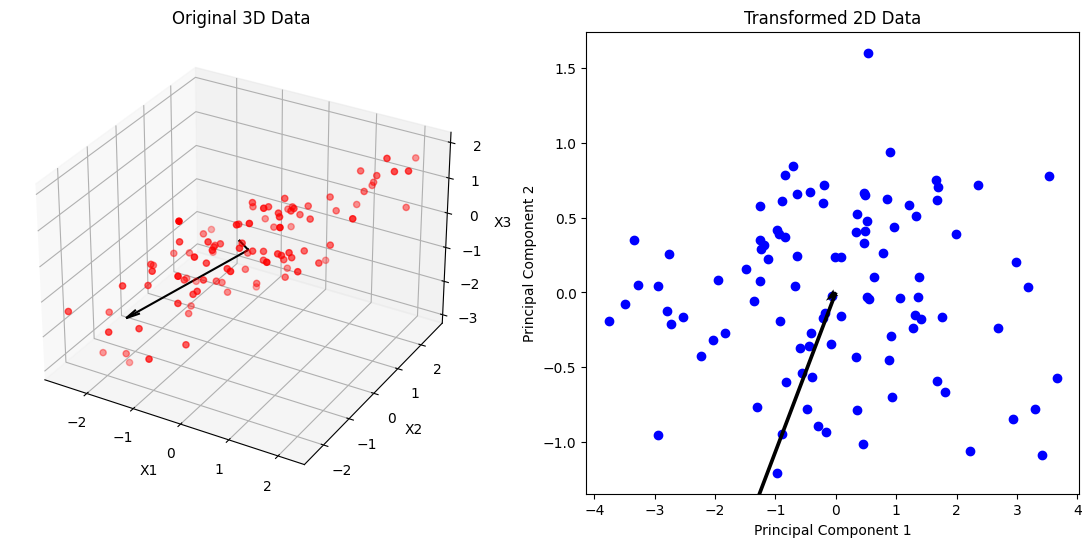

In [6]:
# Step 3: Plot the results
fig = plt.figure(figsize=(14, 6))

# Plot original 3D data with principal components
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='r', marker='o')
ax.set_title('Original 3D Data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Plot the principal components as arrows
origin = np.mean(X, axis=0)  # Mean of the original data
for length, vector in zip(sorted_eigenvalues, sorted_eigenvectors.T):
    ax.quiver(*origin, *(length * vector), color='k', arrow_length_ratio=0.1)

# Plot transformed 2D data
ax2 = fig.add_subplot(122)
ax2.scatter(Y_2[:, 0], Y_2[:, 1], c='b', marker='o')
ax2.set_title('Transformed 2D Data')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')

# Plot the principal components in 2D
for length, vector in zip(sorted_eigenvalues[:2], P_2.T):
    ax2.quiver(0, 0, length * vector[0], length * vector[1], color='k', angles='xy', scale_units='xy', scale=1)

plt.show()